<a href="https://colab.research.google.com/github/ayshahaneena/Stock-Price-Prediction-using-LSTM/blob/main/Stock_price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                               **Stock Price Prediction Using LSTM**

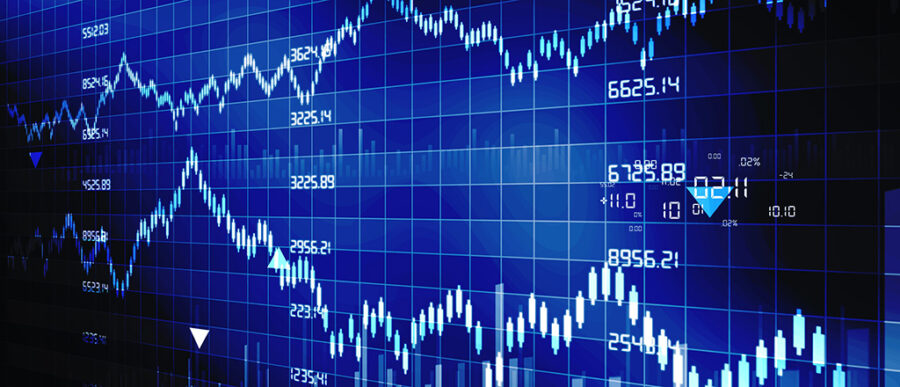

In [ ]:
! pip install --upgrade mplfinance

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/preprocessed_CAC40.csv', parse_dates=['Date'])

In [ ]:
df.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.shape

(97648, 7)

In [ ]:
# To filter specific data from dataframe
def specific_data(company, start, end):
  company_data = df[df['Name'] == company]
  date_filtered_data = company_data[(company_data['Date'] > start) & (company_data['Date'] < end)]
  return date_filtered_data

In [ ]:
df['Name'].unique().tolist()

['Accor',
 'Air Liquide',
 'Airbus ',
 'ArcelorMittal',
 'Atos',
 'AXA',
 'BNP Paribas',
 'Bouygues',
 'Cap Gemini',
 'Crédit Agricole',
 'Danone',
 'Dassault Systèmes',
 'Engie (ex GDF Suez',
 'EssilorLuxottica',
 'Hermès (Hermes International',
 'Kering',
 'LEGRAND',
 'LOréal',
 'LVMH Moet Hennessy Louis Vuitton',
 'Michelin (Compagnie Générale d Etablissements Michelin SCPA',
 'Orange',
 'Pernod Ricard',
 'Peugeot',
 'Publicis',
 'Renault',
 'SAFRAN',
 'Saint-Gobain',
 'Sanofi',
 'Schneider Electric',
 'Société Générale (Societe Generale',
 'Sodexo',
 'STMicroelectronics',
 'TOTAL',
 'Unibail-Rodamco',
 'Veolia Environnement',
 'VINCI',
 'Vivendi',
 'Worldline SA']

In [ ]:
company_name = random.choice(df['Name'].unique().tolist())
start_date = dt.datetime(2014,1,1)
end_date = dt.datetime(2024,1,1)

df1 = specific_data(company_name, start_date, end_date)

In [ ]:
df1.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
70195,Sanofi,2020-04-02,79.13,80.05,80.05,77.55,"5,755"
70196,Sanofi,2020-04-01,80.00,78.72,80.00,76.30,"4,129"
70197,Sanofi,2020-03-31,81.50,80.40,82.13,78.58,"4,597"
70198,Sanofi,2020-03-30,80.80,80.80,81.50,75.56,"4,06"
70199,Sanofi,2020-03-27,78.10,78.00,79.08,76.38,"4,54"


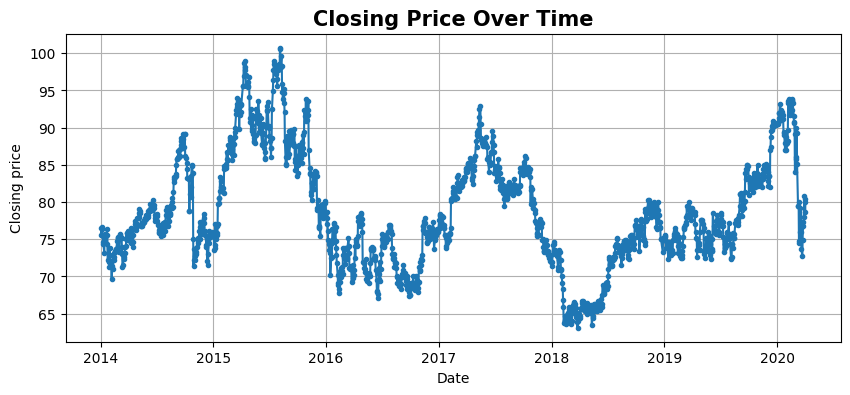

In [ ]:
df1['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,4))
plt.plot(df1['Date'], df1['Closing_Price'], marker='.')
plt.title('Closing Price Over Time', fontsize=15, fontweight= 'bold')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.grid(True)
plt.show()

### OPEN-HIGH-LOW-CLOSE Plot

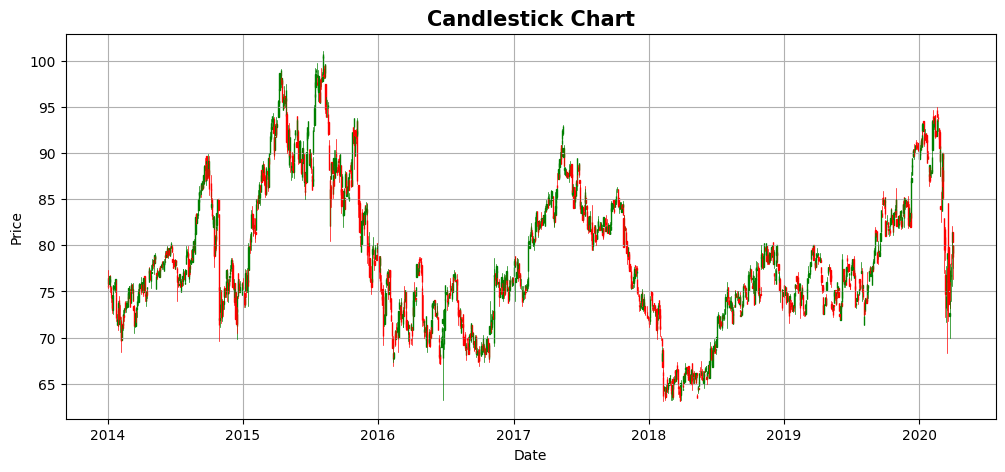

In [ ]:
# convert date into matplotlib format
matplotlib_date = mdates.date2num(df1['Date'])
# This line prepares the OHLC data for plotting. It uses np.vstack to stack the date, open, close, high, and low prices vertically
ohlc = np.vstack((matplotlib_date, df1['Open'], df1['Daily_High'], df1['Daily_Low'], df1['Closing_Price'])).T

plt.figure(figsize=(12,5))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width = 0.8, colorup= 'g', colordown= 'r')
plt.title('Candlestick Chart',fontsize=15, fontweight= 'bold')
ax.xaxis_date()  # The ax.xaxis_date() method in Matplotlib is used to explicitly set the x-axis to display dates
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

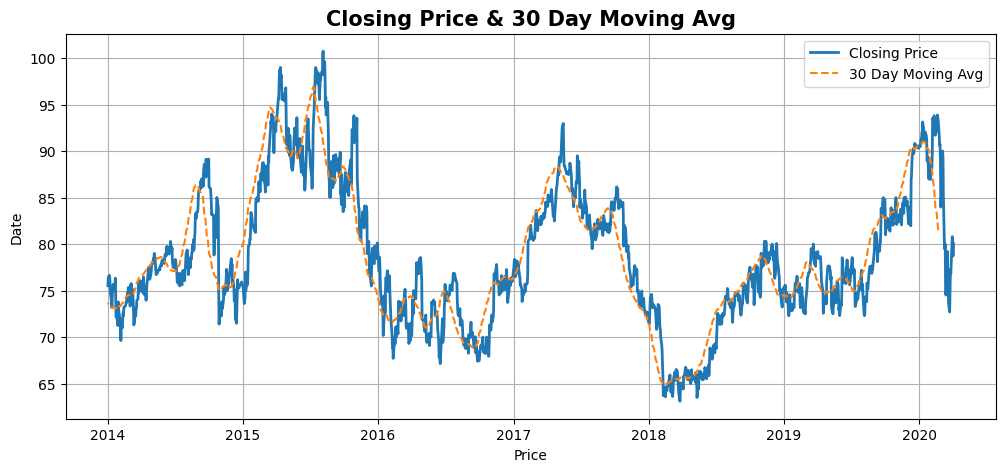

In [ ]:
# 30 Days Moving Average
window= 30
MA_30_days = df1['Closing_Price'].rolling(window=window).mean()

plt.figure(figsize=(12,5))
plt.plot(df1['Date'] , df1['Closing_Price'] , label='Closing Price', linewidth = 2)
plt.plot(df1['Date'] , MA_30_days , label= f'{window} Day Moving Avg', linestyle= '--')
plt.title(f'Closing Price & {window} Day Moving Avg',fontsize=15, fontweight= 'bold')
plt.xlabel('Price')
plt.ylabel('Date')
plt.grid(True)
plt.legend()
plt.show()

A 30-day moving average is a statistical calculation used to analyze time series data, commonly used in finance to smooth out short-term fluctuations and highlight longer-term trends.

In [ ]:
df1['Month'] = df1['Date'].dt.month

monthly_average = df1.groupby('Month')['Closing_Price'].mean()


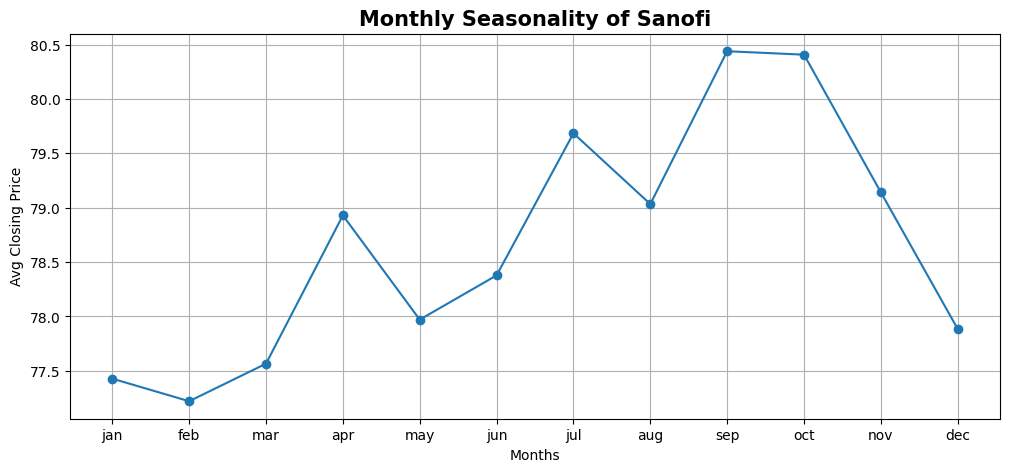

In [ ]:

plt.figure(figsize=(12,5))
plt.plot(monthly_average.index , monthly_average.values , marker = 'o')
plt.title(f'Monthly Seasonality of {company_name}',fontsize=15, fontweight= 'bold')
plt.xlabel('Months')
plt.ylabel('Avg Closing Price')
plt.xticks(range(1,13), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.grid(True)
plt.show()

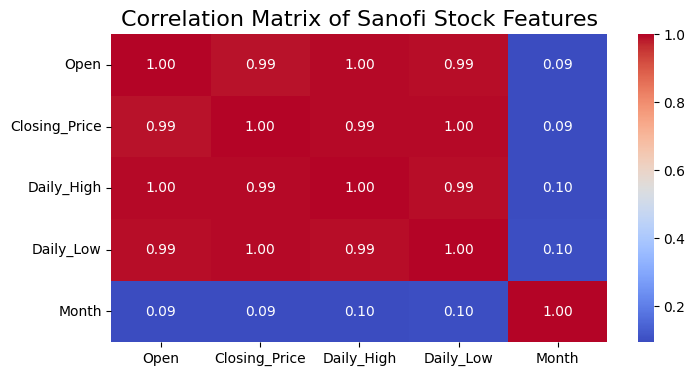

In [ ]:
import seaborn as sns
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[np.number])

# Calculate and visualize the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix of {company_name} Stock Features', fontsize=16)
plt.show()

In [ ]:
df1.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume,Month
70195,Sanofi,2020-04-02,79.13,80.05,80.05,77.55,"5,755",4
70196,Sanofi,2020-04-01,80.00,78.72,80.00,76.30,"4,129",4
70197,Sanofi,2020-03-31,81.50,80.40,82.13,78.58,"4,597",3
70198,Sanofi,2020-03-30,80.80,80.80,81.50,75.56,"4,06",3
70199,Sanofi,2020-03-27,78.10,78.00,79.08,76.38,"4,54",3


In [ ]:
df2 = df1.reset_index()['Closing_Price']

In [ ]:
df2

0       80.05
1       78.72
2       80.40
3       80.80
4       78.00
        ...  
1575    75.50
1576    76.38
1577    76.64
1578    76.45
1579    75.52
Name: Closing_Price, Length: 1580, dtype: float64

In [ ]:
# Scaling , Converting to numpy array , Reshaping
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [ ]:
df2

array([[0.4501992 ],
       [0.41487384],
       [0.45949535],
       ...,
       [0.35962815],
       [0.35458167],
       [0.32988048]])

In [ ]:
df2.shape

(1580, 1)

## Train - Test Split

In [ ]:
train_size = int(len(df2) * 0.8)  # 80% for training
train_data , test_data = df2[ : train_size] , df2[train_size : ]

In [ ]:
print('Shape of train data: ',train_data.shape)
print('Shape of test data: ',test_data.shape)

Shape of train data:  (1264, 1)
Shape of test data:  (316, 1)


In [ ]:
n_pasts = 60

x_train, y_train = [] , []
for i in range( n_pasts , len(train_data)):
  x_train.append(train_data[i - n_pasts:i, 0])
  y_train.append(train_data[i,0])
x_train, y_train = np.array(x_train) , np.array(y_train)


x_test, y_test = [] , []
for i in range( n_pasts , len(test_data)):
  x_test.append(test_data[i - n_pasts:i, 0])
  y_test.append(test_data[i,0])
x_test, y_test = np.array(x_test) , np.array(y_test)


In [ ]:
print(x_train.shape, y_train.shape)

(1204, 60) (1204,)


In [ ]:
y_train

array([0.76653386, 0.76786189, 0.737583  , ..., 0.86454183, 0.86427623,
       0.79946879])

In [ ]:
print('training set size :-')
print(x_train.shape)
print(y_train.shape)
print('\n')
print('testing set size :-')
print(x_test.shape)
print(y_test.shape)

training set size :-
(1204, 60)
(1204,)


testing set size :-
(256, 60)
(256,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1 )
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1 )

In [ ]:
print('training set size :-')
print(x_train.shape)
print(y_train.shape)
print('\n')
print('testing set size :-')
print(x_test.shape)
print(y_test.shape)

training set size :-
(1204, 60, 1)
(1204,)


testing set size :-
(256, 60, 1)
(256,)


# **LSTM** MODEL

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
checkpoints = ModelCheckpoint(filepath= 'my_weights.h5', save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience= 15 , restore_best_weights=True)

model.fit(x_train, y_train,
          validation_data= (x_test, y_test),
          epochs= 100,
          verbose= 1,
          batch_size= 32,
          callbacks = [checkpoints, earlystopping])

Epoch 1/100
38/38 [==============================] - 23s 321ms/step - loss: 0.0300 - val_loss: 0.0069
Epoch 2/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0085 - val_loss: 0.0058
Epoch 3/100
38/38 [==============================] - 10s 261ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 4/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0068 - val_loss: 0.0046
Epoch 5/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 6/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0062 - val_loss: 0.0044
Epoch 7/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0061 - val_loss: 0.0042
Epoch 8/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 9/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 10/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0057 - val_loss

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

8/8 [==============================] - 0s 40ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

78.43461084933438
77.60296274081402


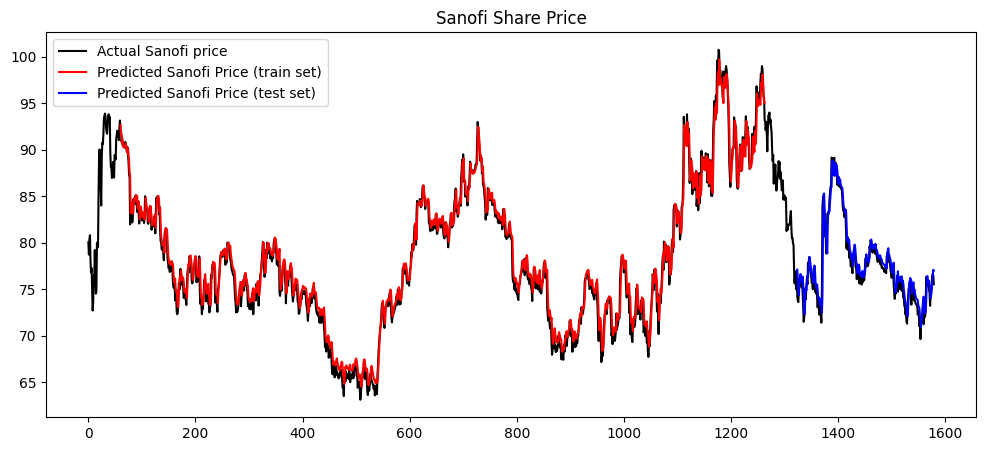

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df2, train_predict, test_predict, scaler, and company_name are already defined

look_back = 60

# Create an array of the same shape as df2 and fill it with NaNs
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:] = np.nan

# Place train_predict in the correct position within the array
trainPredictPlot[look_back:len(train_predict)+look_back, 0] = train_predict.flatten()

# Create an array of the same shape as df2 and fill it with NaNs
testPredictPlot = np.empty_like(df2)
testPredictPlot[:] = np.nan

# Calculate the starting index for the test predictions
test_start = len(df2) - len(test_predict)

# Place test_predict in the correct position within the array
testPredictPlot[test_start: ,0] = test_predict.flatten()

# Inverse transform the scaled df2 to get the actual values
new_df = scaler.inverse_transform(df2)

# Plot the actual values and the predictions
plt.figure(figsize=(12, 5))
plt.plot(new_df, color='black', label=f'Actual {company_name} price')
plt.plot(trainPredictPlot, color='red', label=f'Predicted {company_name} Price (train set)')
plt.plot(testPredictPlot, color='blue', label=f'Predicted {company_name} Price (test set)')

plt.title(f'{company_name} Share Price')
plt.legend()
plt.show()


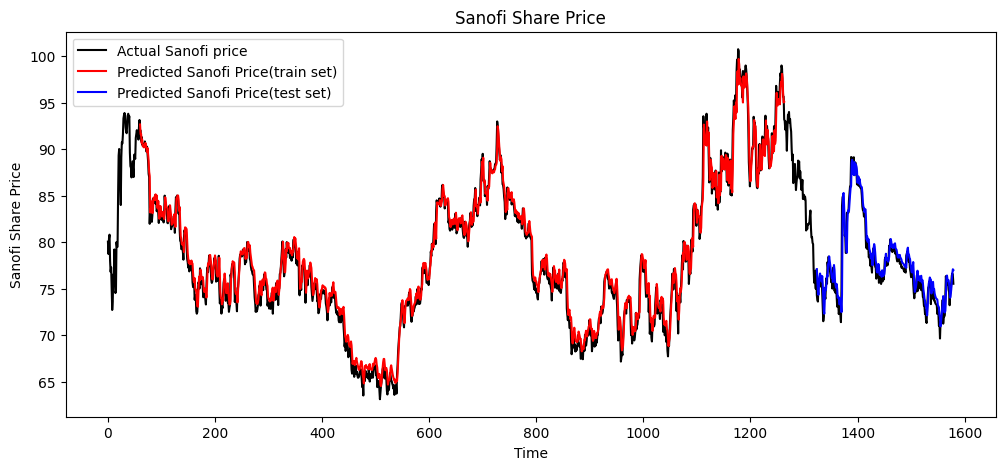

In [ ]:
look_back = 60

trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,0] = train_predict.flatten()

testPredictPlot = np.empty_like(df2)
testPredictPlot[:] = np.nan
test_start = len(df2) - len(test_predict)
testPredictPlot[test_start:,0] = test_predict.flatten()

new_df = scaler.inverse_transform(df2)

plt.figure(figsize=(12,5))
plt.plot(new_df,color='black', label=f'Actual {company_name} price')
plt.plot(trainPredictPlot , color='red', label= f'Predicted {company_name} Price(train set)')
plt.plot(testPredictPlot , color='blue', label= f'Predicted {company_name} Price(test set)')

plt.title(f'{company_name} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company_name} Share Price')
plt.legend()
plt.show()

In [ ]:
last_sequence = x_test[-1]
last_sequence = last_sequence.reshape(1, n_pasts ,1)

In [ ]:
last_sequence.shape

(1, 60, 1)

In [ ]:
predictions_for_next_10days = []

for _ in range(10):
  next_day_prediction = model.predict(last_sequence)
  predictions_for_next_10days.append(next_day_prediction[0,0])  # Get the predicted model
  last_sequence = np.roll(last_sequence , -1 , axis=1) # shift sequence by one day
  last_sequence[0 , -1 , 0] = next_day_prediction  # update the last element with new prediction

predictions_for_next_10days = scaler.inverse_transform(np.array(predictions_for_next_10days).reshape(-1,1))

print('Prediction for next 10 Days')
for i, prediction in enumerate(predictions_for_next_10days,start=1):
  print(f'Day {i} Predicted Price = {prediction[0]}')

1/1 [==============================] - 0s 31ms/step
Prediction for next 10 Days
Day 1 Predicted Price = 76.99573516845703
Day 2 Predicted Price = 77.23728942871094
Day 3 Predicted Price = 77.50382232666016
Day 4 Predicted Price = 77.75647735595703
Day 5 Predicted Price = 77.99544525146484
Day 6 Predicted Price = 78.22311401367188
Day 7 Predicted Price = 78.44182586669922
Day 8 Predicted Price = 78.6536865234375
Day 9 Predicted Price = 78.86036682128906
Day 10 Predicted Price = 79.06315612792969


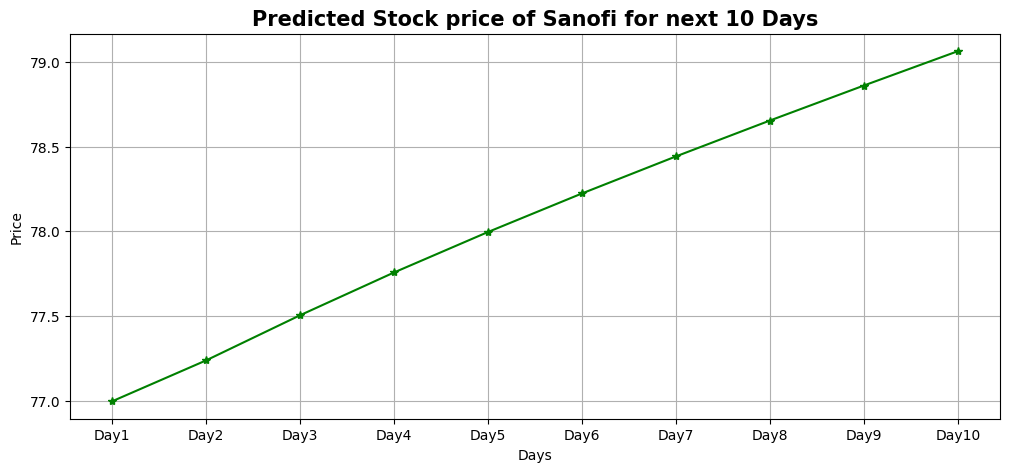

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(predictions_for_next_10days, marker='*', color='green')
plt.title(f'Predicted Stock price of {company_name} for next 10 Days', fontsize=15, fontweight= 'bold')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0,10), ['Day1','Day2','Day3', 'Day4', 'Day5','Day6','Day7','Day8','Day9','Day10'])
plt.grid(True)
plt.show()